In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
resLevels = pd.read_csv("chennai_reservoir_levels.csv")

In [6]:
resLevels.head(5)


,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


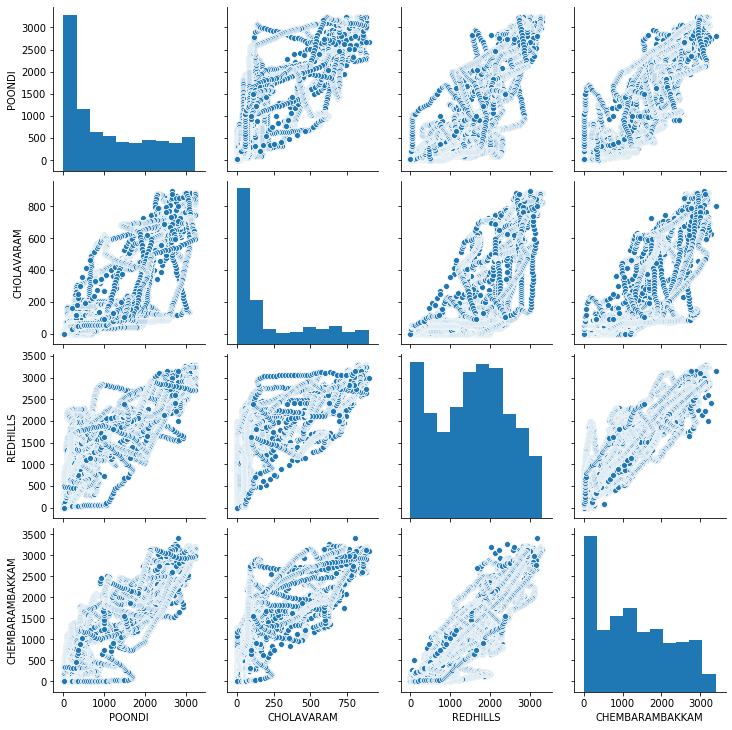

In [8]:
sns.pairplot(resLevels)

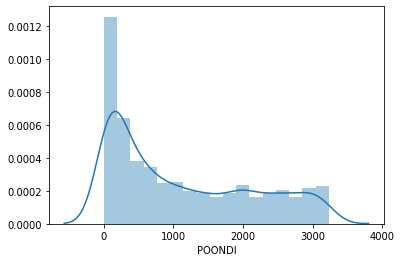

In [9]:
sns.distplot(resLevels["POONDI"])

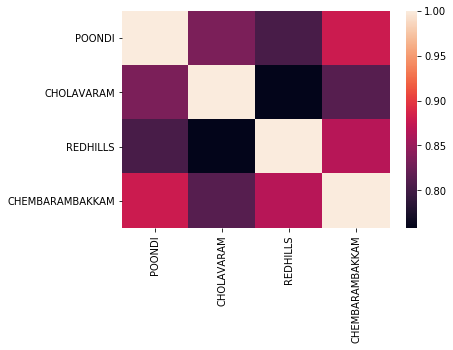

In [10]:
sns.heatmap(resLevels.corr())

In [12]:
resLevels.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'], dtype='object')

In [13]:
x = resLevels[['POONDI', 'CHOLAVARAM', 'REDHILLS']]
y = resLevels['CHEMBARAMBAKKAM']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=101)

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
print(lm.intercept_)

30.00438101724012


In [24]:
coeff_df = pd.DataFrame(lm.coef_, x.columns, columns = ["Coefficient"])
coeff_df

,Coefficient
POONDI,0.400201
CHOLAVARAM,0.492306
REDHILLS,0.451300


In [25]:
predictions = lm.predict(X_test)

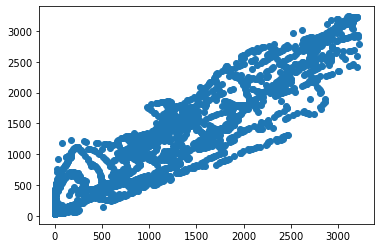

In [26]:
plt.scatter(y_test, predictions)

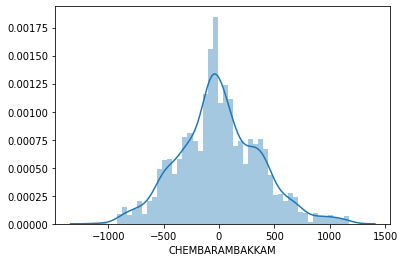

In [27]:
sns.distplot((y_test-predictions),bins=50)

In [28]:
from sklearn import metrics 


In [30]:
print("MAE",metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 283.38525750089303
MSE: 134539.1562207344
RMSE: 366.7957963509593
